In [1]:
!pip install networkx

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
## imports
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [3]:
## create directories IF_DO_NOT_EXIST
from pathlib import Path
Path("./results").mkdir(parents=True, exist_ok=True)
Path("./plots").mkdir(parents=True, exist_ok=True)


In [4]:
def get_graph(fp):
    
    nodes = 0
    edges = 0
    DEBUG = 0
    imdb = nx.Graph()
    adj  =  open(fp, "r")

    with open(fp, "r") as adj_list:
        for line in adj_list:
            if nodes == 0:
                if DEBUG:
                    print(f"nodes = {nodes}")
                u, j  = line.split(",")
                nodes = int(u.strip())
                for i in range(nodes):
                    imdb.add_node(str(i))
                if DEBUG:
                    print(f"nodes = {nodes}")
                continue
            u, v, w = line.split(",")
            imdb.add_edge(u.strip(), v.strip())
            edges += 1
    if DEBUG:
        print(f"DEBUG = {DEBUG}")
    return imdb

# BUILTIN_

In [5]:
##read input files
fp = "./imdb_prodco.adj"
imdb_data = get_graph(fp)
cen_lib = nx.closeness_centrality(imdb_data)
cen_lib = sorted(cen_lib.items(), key=lambda x: x[1], reverse=True)

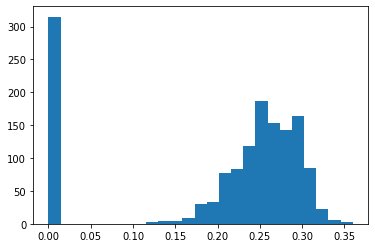

In [6]:
out_fp = './plots/closeness_dist_INBUILT.png'
cen_values = [value for key,value in cen_lib]
plt.figure()
plt.hist(cen_values, bins=25)
plt.savefig(out_fp)

# Implementation

In [7]:
def bfs_nod(graph, source):

        n = graph.number_of_nodes()
        bfs_traverse = []

        # keep track of nodes traversed already
        is_visited = [False] * n
        d = [1e9]*n
        # Queue used for keeping track of next node to be travelled - start with Source
        queue = [source]

        # mark source as visited (as its already added to queue_
        is_visited[source] = True
        d[source] = 0
        
        while len(queue) > 0:

            # pop (first) element of the queue
            curr_node = queue.pop(0)
            bfs_traverse.append(curr_node)

            # add the neighbouring nodes that were still not visited
            for neighbour_node in list(graph.neighbors(str(curr_node))):
                neighbour_node = int(neighbour_node)
                if not is_visited[neighbour_node]:
                    queue.append(neighbour_node)
                    d[neighbour_node] = d[curr_node] + 1
                    # make visited True as they join queue
                    is_visited[neighbour_node] = True
        
        ans = {}
        
        for i in range(n):
            if d[i]!=1e9:
                ans[str(i)] = d[i]
        
        return ans
                

In [8]:
def close_cen(graph):
    d = {}
    N = graph.number_of_nodes()
    for node in graph.nodes():
        d[node] = bfs_nod(graph, int(node))
    c_cen = {}
    for node in graph.nodes():
        cv = float(sum(d[node].values()))
        n = len(d[node])-1
        if sum(d[node].values())==0:
            val = 0
        else:
            val = ((n-1)*(n-1))/(float(N-1)*cv)
        c_cen[node] = val
    return c_cen

In [9]:
centrality = close_cen(imdb_data)
output_2 = open("output_2_closeness.txt", "w")
for key in centrality.keys():
    output_2.write(f"{key} {centrality[key]}\n")

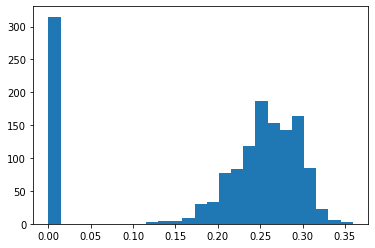

In [10]:
out_fp = './plots/closeness_dist_IMPLEMENTED.png'
cen_values = [centrality[key] for key in centrality.keys()]
plt.figure()
plt.hist(cen_values, bins=25)
plt.savefig(out_fp)

In [11]:
###OVERLAP###
cent_IMP = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
cent_INB = cen_lib
imp = [key for key,value in cent_IMP[:50]]
inb = [key for key,value in cent_INB[:50]]
output_2 = open("output_2.txt", "w")
output_2.write(f"#overlaps for Closeness Centrality: {len(list(set(imp).intersection(set(inb))))}")

38